<a href="https://colab.research.google.com/github/Swastik-73/Image-Classification-DL/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [ ]:
"""
* OS module is used to navigate through file structures.
"""

import tensorflow as tf
import os

In [ ]:
"""Used to avoid out of memory error by setting GPU memory consumption growth"""

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')
print("GPU : ", gpus)
print("CPU : ", cpus)

GPU :  []
CPU :  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Build a data pipeline

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
image_exts = ['jpg','jpeg','bmp','png']

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
data_dir = r'/content/gdrive/MyDrive/Colab Notebooks/imageclass'

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

In [ ]:
img = cv2.imread(os.path.join('/content/gdrive/MyDrive/Colab Notebooks/imageclass','happy','image15.jpeg'))

In [ ]:
print(img)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(183, 275, 3)

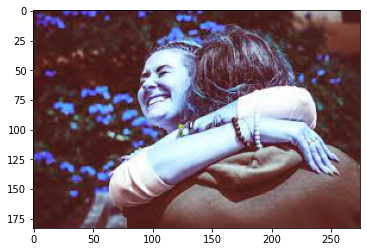

In [ ]:
plt.imshow(img)

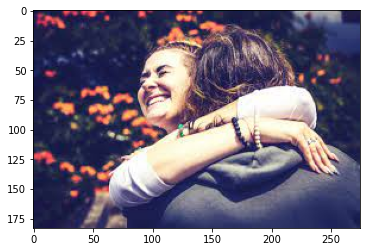

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

In [ ]:
tf.data.Dataset??

?? - gives documentation

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 173 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
# Get anpther batch from the iterator
batch = data_iterator.next()

In [ ]:
batch
len(batch)

2

In [ ]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
"""
Class 1 = Sad,
Class 0 = Happy
"""

batch[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

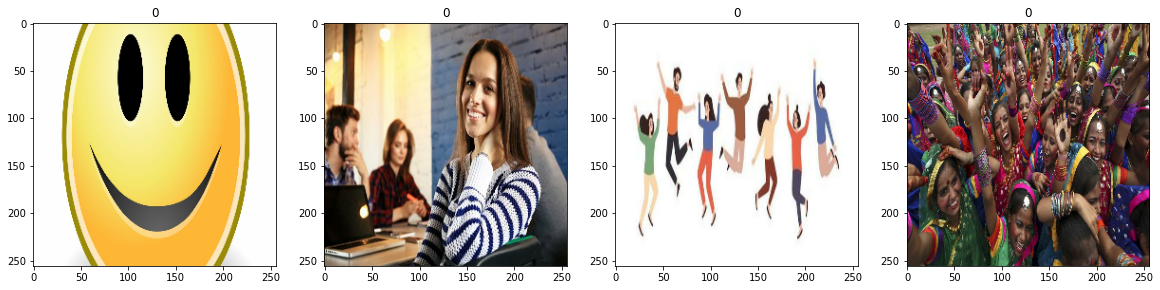

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0]

In [ ]:
batch[0] / 255

In [ ]:
scaled = batch[0] / 255
scaled.max()

1.0

Preprocess Data

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
data.as_numpy_iterator().next()[0].min()

0.0

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

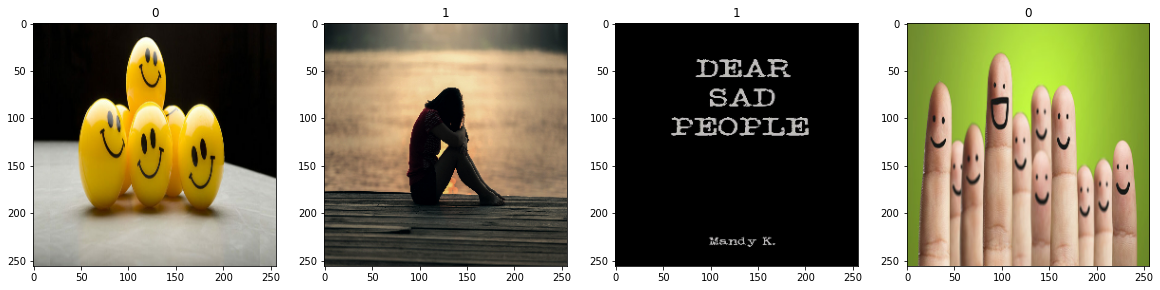

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

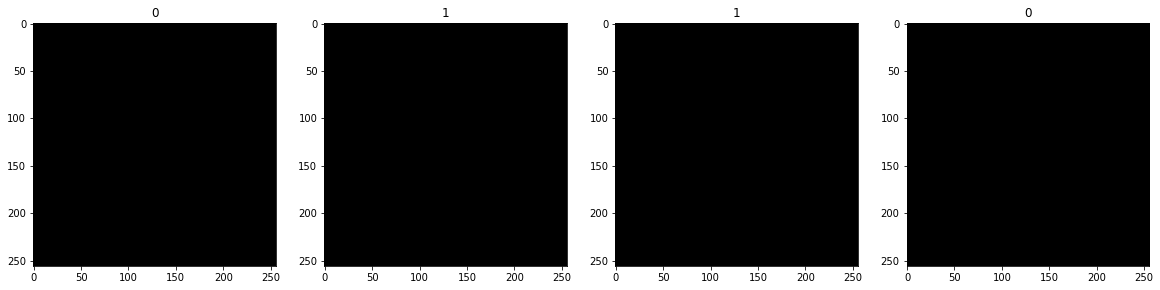

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch

Split Data

In [ ]:
len(data)

6

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
print(train_size, val_size, test_size)

4 1 1


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## DEEP LEARNING MODEL

Build DL Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [ ]:
logdir = r'/content/gdrive/MyDrive/Colab Notebooks/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 17s 3s/step - loss: 0.6903 - accuracy: 0.5391 - val_loss: 0.6323 - val_accuracy: 0.6562
Epoch 2/20
4/4 [==============================] - 13s 3s/step - loss: 0.5942 - accuracy: 0.6250 - val_loss: 0.5027 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 14s 3s/step - loss: 0.5034 - accuracy: 0.7656 - val_loss: 0.5278 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 15s 3s/step - loss: 0.4970 - accuracy: 0.8047 - val_loss: 0.3902 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 15s 3s/step - loss: 0.3845 - accuracy: 0.8516 - val_loss: 0.2327 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 14s 3s/step - loss: 0.3187 - accuracy: 0.9062 - val_loss: 0.2242 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.2796 - accuracy: 0.9141 - val_loss: 0.3050 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

In [ ]:
hist.history

{'loss': [0.6903393268585205,
  0.5942298769950867,
  0.5034263134002686,
  0.4970444440841675,
  0.38453322649002075,
  0.3187240660190582,
  0.2796090841293335,
  0.21785017848014832,
  0.17414169013500214,
  0.09128016978502274,
  0.07712205499410629,
  0.05632879212498665,
  0.02720394730567932,
  0.023165475577116013,
  0.049467332661151886,
  0.015173235908150673,
  0.01170030515640974,
  0.04722536355257034,
  0.17272570729255676,
  0.08601857721805573],
 'accuracy': [0.5390625,
  0.625,
  0.765625,
  0.8046875,
  0.8515625,
  0.90625,
  0.9140625,
  0.9296875,
  0.953125,
  1.0,
  0.9765625,
  0.984375,
  1.0,
  1.0,
  0.984375,
  1.0,
  1.0,
  0.9921875,
  0.9765625,
  0.984375],
 'val_loss': [0.6323275566101074,
  0.5026920437812805,
  0.5278177261352539,
  0.3901905417442322,
  0.2326866090297699,
  0.2241596132516861,
  0.30501818656921387,
  0.20459163188934326,
  0.1243802011013031,
  0.06706224381923676,
  0.07536526769399643,
  0.05422695726156235,
  0.04950936138629913

Plot Performance

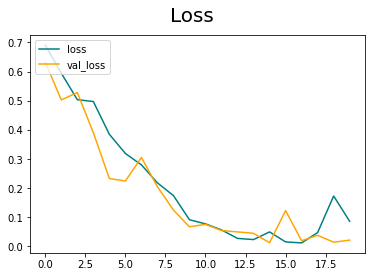

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

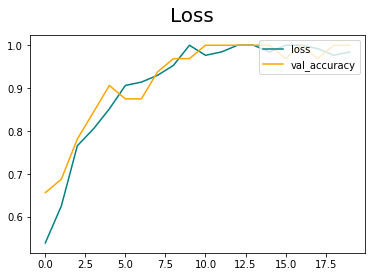

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

## Evaluate Performance

Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

1